In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-59.19154875387862 44.16403193381882
-63.77571107778693 90.67695065763138
-55.26859109633186 -48.39340639697576
-0.2399827450339984 1.1333164121178925
4.048834170337798 -9.135645018314847
40.295583191802365 101.02440797301807
-0.24734515755743303 -0.8134480165728633
63.92041877749216 62.00650103298639
52.8036952932398 4.373428187569743
-49.77667831082288 -28.46489794981545
-16.099467400133264 -23.639200763276364
-49.88105276473506 -159.7152677879306
-74.78280250031774 -129.6175442815633
-63.98868640118427 174.27186773719177
-29.617981952622138 -129.75485906180958
24.46406108145149 106.06371003831043
-40.83764752928334 -12.046724610237476
-84.19604505231159 20.499756765832075
-88.27795059132573 -117.6841440013288
-64.42544197165768 -56.72111578046194
-9.217624710634169 137.463114601766
51.77538047321386 -51.60743599288247
11.701661940971846 45.2438596870696
-52.82312542530723 173.09747630869532
7.110283751890904 167.70976361194425
-9.668211808016437 143.99972619756682
-4.058269062744316

-50.65566510178249 94.1956603881851
62.792781746994365 13.889975246690398
86.6911008905279 117.54687743636777
22.57889972969444 114.4603113423529
-44.83332706708668 54.37855608593358
-34.4731647462468 96.20960220047124
-33.12218234812918 -24.116323252861918
80.91899088104412 -1.427687418789617
-26.346060760496968 74.03729918860802
55.328296022075335 22.661032806308356
66.58602254902382 -77.75507629168632
-89.71079535184049 178.514389317294
65.24549735341793 164.73735915262574
50.73866468577879 177.24596439706795
-18.75924454216947 78.25482931355515
-81.46343893446155 133.15169064326494
54.86773974496117 -168.35639361660665
-87.1429190159962 34.59913321210104
79.31673906900537 71.57948295416793
64.8964023378393 71.69247155109488
82.74303312933037 -140.74549462777713
11.42266432925372 -158.4435605676203
-26.401539373947983 158.1994846325706
-55.4770103502042 176.86716245208197
9.285527065739913 39.93866726618532
-11.47933267030011 -173.32107611849824
-48.9154898936914 -105.34364543053306

In [13]:
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

767

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c89ad4c4786f72dcb6c1a98e9c117e9


In [17]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [20]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   

Processing Record 1 of Set 16 | east london
Processing Record 2 of Set 16 | busselton
Processing Record 3 of Set 16 | mar del plata
Processing Record 4 of Set 16 | mumford
Processing Record 5 of Set 16 | harper
Processing Record 6 of Set 16 | zhangye
Processing Record 7 of Set 16 | takoradi
Processing Record 8 of Set 16 | agirish
Processing Record 9 of Set 16 | bergen
Processing Record 10 of Set 16 | cidreira
Processing Record 11 of Set 16 | georgetown
Processing Record 12 of Set 16 | mataura
Processing Record 13 of Set 16 | rikitea
Processing Record 14 of Set 16 | kaitangata
Processing Record 15 of Set 16 | bose
Processing Record 16 of Set 16 | jamestown
Processing Record 17 of Set 16 | bredasdorp
Processing Record 18 of Set 16 | punta arenas
Processing Record 19 of Set 16 | ushuaia
Processing Record 20 of Set 16 | merauke
Processing Record 21 of Set 16 | bonavista
Processing Record 22 of Set 16 | aden
Processing Record 23 of Set 16 | butaritari
Processing Record 24 of Set 16 | daru
P

Processing Record 36 of Set 19 | karauzyak
City not found. Skipping...
Processing Record 37 of Set 19 | marsa matruh
Processing Record 38 of Set 19 | havre-saint-pierre
Processing Record 39 of Set 19 | ferrol
Processing Record 40 of Set 19 | hilo
Processing Record 41 of Set 19 | yulara
Processing Record 42 of Set 19 | puerto leguizamo
Processing Record 43 of Set 19 | tuktoyaktuk
Processing Record 44 of Set 19 | baker city
Processing Record 45 of Set 19 | cuenca
Processing Record 46 of Set 19 | ostrovnoy
Processing Record 47 of Set 19 | oistins
Processing Record 48 of Set 19 | mahebourg
Processing Record 49 of Set 19 | port blair
Processing Record 50 of Set 19 | yellowknife
Processing Record 1 of Set 20 | comodoro rivadavia
Processing Record 2 of Set 20 | korla
Processing Record 3 of Set 20 | mullaitivu
City not found. Skipping...
Processing Record 4 of Set 20 | gilgit
Processing Record 5 of Set 20 | manokwari
Processing Record 6 of Set 20 | constitucion
Processing Record 7 of Set 20 | 

Processing Record 21 of Set 23 | kaduqli
Processing Record 22 of Set 23 | batagay
Processing Record 23 of Set 23 | palora
Processing Record 24 of Set 23 | surenavan
Processing Record 25 of Set 23 | lebu
Processing Record 26 of Set 23 | kuusamo
Processing Record 27 of Set 23 | biltine
Processing Record 28 of Set 23 | caraz
Processing Record 29 of Set 23 | mogadishu
Processing Record 30 of Set 23 | maragogi
Processing Record 31 of Set 23 | boralday
Processing Record 32 of Set 23 | saldanha
Processing Record 33 of Set 23 | parana
Processing Record 34 of Set 23 | ouesso
Processing Record 35 of Set 23 | tagusao
Processing Record 36 of Set 23 | kazalinsk
City not found. Skipping...
Processing Record 37 of Set 23 | goderich
Processing Record 38 of Set 23 | nguiu
City not found. Skipping...
Processing Record 39 of Set 23 | azimur
City not found. Skipping...
Processing Record 40 of Set 23 | sochi
Processing Record 41 of Set 23 | atar
Processing Record 42 of Set 23 | kaduna
Processing Record 43 

Processing Record 6 of Set 27 | tiruvottiyur
City not found. Skipping...
Processing Record 7 of Set 27 | ewa beach
Processing Record 8 of Set 27 | solnechnyy
Processing Record 9 of Set 27 | parys
Processing Record 10 of Set 27 | goure
Processing Record 11 of Set 27 | jiazi
Processing Record 12 of Set 27 | dudinka
Processing Record 13 of Set 27 | topchikha
Processing Record 14 of Set 27 | savannah bight
Processing Record 15 of Set 27 | svetlaya
Processing Record 16 of Set 27 | east stroudsburg
Processing Record 17 of Set 27 | mareeba
Processing Record 18 of Set 27 | sabla
Processing Record 19 of Set 27 | aykhal
Processing Record 20 of Set 27 | muzhi
Processing Record 21 of Set 27 | laguna
Processing Record 22 of Set 27 | ambon
Processing Record 23 of Set 27 | blonduos
City not found. Skipping...
Processing Record 24 of Set 27 | mabalacat
Processing Record 25 of Set 27 | eureka
Processing Record 26 of Set 27 | riverton
Processing Record 27 of Set 27 | ruteng
Processing Record 28 of Set 2

Processing Record 38 of Set 30 | lazarev
Processing Record 39 of Set 30 | ararat
Processing Record 40 of Set 30 | mingaora
Processing Record 41 of Set 30 | tsumeb
Processing Record 42 of Set 30 | vestmanna
Processing Record 43 of Set 30 | baglan
Processing Record 44 of Set 30 | samfya
Processing Record 45 of Set 30 | bambanglipuro
Processing Record 46 of Set 30 | skjervoy
Processing Record 47 of Set 30 | manzanillo
Processing Record 48 of Set 30 | cacu
Processing Record 49 of Set 30 | boljarovo
City not found. Skipping...
Processing Record 50 of Set 30 | groningen
Processing Record 1 of Set 31 | chicama
Processing Record 2 of Set 31 | samalaeulu
City not found. Skipping...
Processing Record 3 of Set 31 | southbridge
Processing Record 4 of Set 31 | mehamn
Processing Record 5 of Set 31 | sinkat
City not found. Skipping...
Processing Record 6 of Set 31 | sakakah
Processing Record 7 of Set 31 | ranau
Processing Record 8 of Set 31 | mountain home
Processing Record 9 of Set 31 | abu dhabi
Pr

In [26]:
len(city_data)

698

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,56.34,58,0,16.11,ZA,2022-07-31 07:17:59
1,Busselton,-33.6500,115.3333,57.63,66,74,12.26,AU,2022-07-31 07:17:59
2,Mar Del Plata,-38.0023,-57.5575,49.87,87,0,8.01,AR,2022-07-31 07:17:04
3,Mumford,5.2618,-0.7590,73.94,84,100,9.15,GH,2022-07-31 07:17:59
4,Harper,4.3750,-7.7169,75.34,79,97,4.61,LR,2022-07-31 07:18:00
5,Zhangye,38.9342,100.4517,94.73,19,96,7.02,CN,2022-07-31 07:18:00
6,Takoradi,4.8845,-1.7554,74.12,82,100,8.23,GH,2022-07-31 07:15:41
7,Agirish,61.9247,63.0231,71.35,47,100,9.22,RU,2022-07-31 07:18:00
8,Bergen,60.3920,5.3280,59.07,95,75,4.61,NO,2022-07-31 07:18:01
9,Cidreira,-30.1811,-50.2056,54.46,84,100,8.66,BR,2022-07-31 07:18:01


In [28]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]

# Assign city_data_df the new column order.

city_data_df = city_data_df[new_column_order]

city_data_df



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2022-07-31 07:17:59,-33.0153,27.9116,56.34,58,0,16.11
1,Busselton,AU,2022-07-31 07:17:59,-33.6500,115.3333,57.63,66,74,12.26
2,Mar Del Plata,AR,2022-07-31 07:17:04,-38.0023,-57.5575,49.87,87,0,8.01
3,Mumford,GH,2022-07-31 07:17:59,5.2618,-0.7590,73.94,84,100,9.15
4,Harper,LR,2022-07-31 07:18:00,4.3750,-7.7169,75.34,79,97,4.61
...,...,...,...,...,...,...,...,...,...
693,Boende,CD,2022-07-31 07:36:37,-0.2167,20.8667,84.24,56,71,3.67
694,Berbera,SO,2022-07-31 07:36:38,10.4396,45.0143,97.66,33,5,21.79
695,Aljezur,PT,2022-07-31 07:36:38,37.3191,-8.8033,78.80,48,0,0.07
696,Wajir,KE,2022-07-31 07:36:38,1.7471,40.0573,84.65,45,21,19.77


In [30]:
# Create the output file (CSV).
output_data_file = "../weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label=("City_ID"))

In [32]:
# Changing file dfto csv
city_data_df.to_csv('../Weather_Database/WeatherPy_database.csv')

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [34]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/31/22'

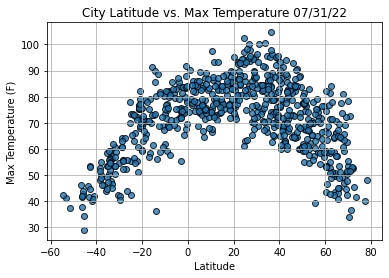

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../weather_data/Fig1.png")

# Show plot.
plt.show()

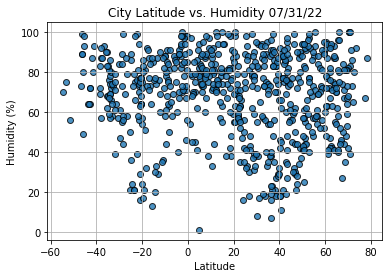

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../weather_data/Fig2.png")
# Show plot.
plt.show()

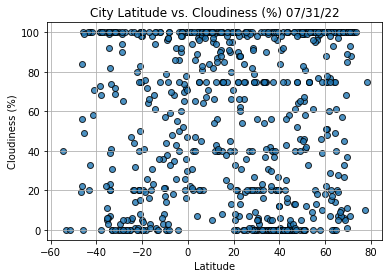

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../weather_data/Fig3.png")
# Show plot.
plt.show()

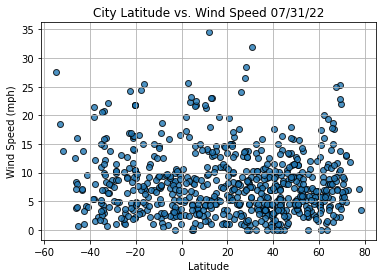

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../weather_data/Fig4.png")
# Show plot.
plt.show()

In [42]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
index13 = city_data_df.loc[13]

In [44]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
693    False
694     True
695     True
696     True
697    False
Name: Lat, Length: 698, dtype: bool

In [45]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Mumford,GH,2022-07-31 07:17:59,5.2618,-0.7590,73.94,84,100,9.15
4,Harper,LR,2022-07-31 07:18:00,4.3750,-7.7169,75.34,79,97,4.61
5,Zhangye,CN,2022-07-31 07:18:00,38.9342,100.4517,94.73,19,96,7.02
6,Takoradi,GH,2022-07-31 07:15:41,4.8845,-1.7554,74.12,82,100,8.23
7,Agirish,RU,2022-07-31 07:18:00,61.9247,63.0231,71.35,47,100,9.22


In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

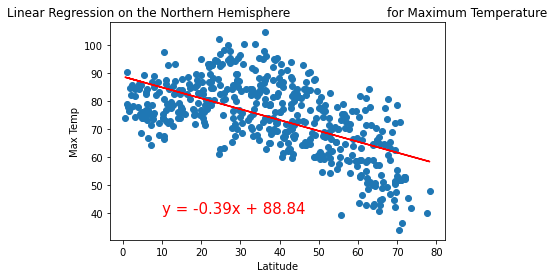

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

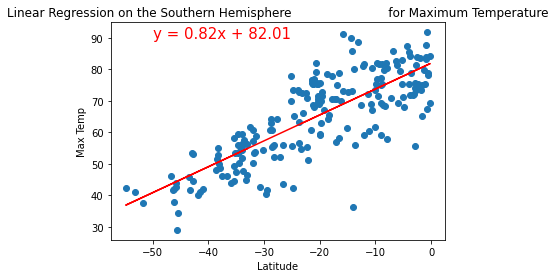

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

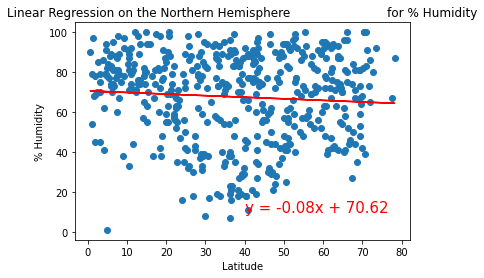

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

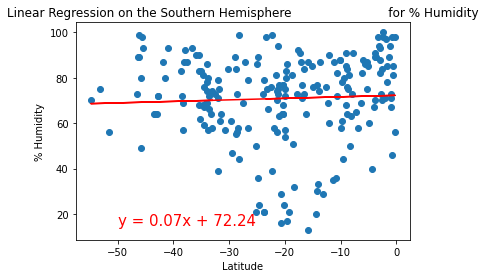

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

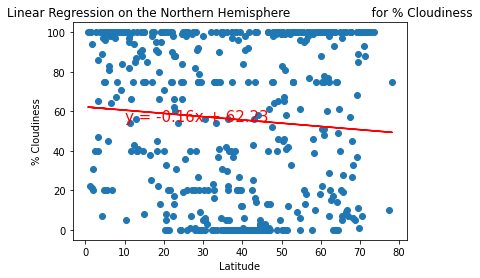

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

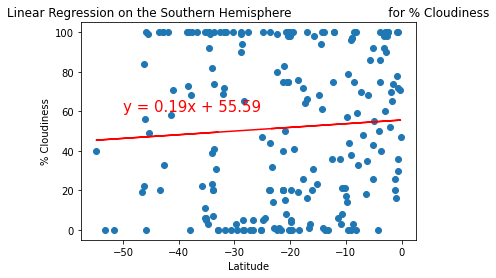

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

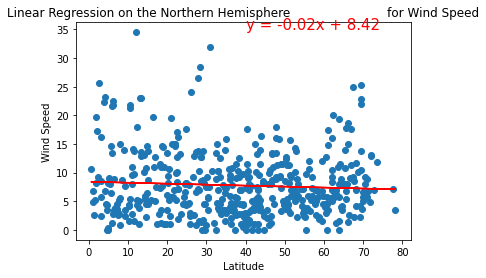

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

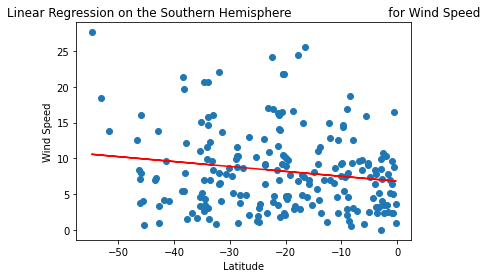

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))